In [14]:

import gc
gc.collect()

0

In [5]:
#@title Setup
transformers_version = "v4.29.0" #@param ["main", "v4.29.0"] {allow-input: true}

print(f"Setting up everything with transformers version {transformers_version}")

!pip install huggingface_hub>=0.14.1 git+https://github.com/huggingface/transformers@$transformers_version -q diffusers accelerate datasets torch soundfile sentencepiece opencv-python openai

import IPython
import soundfile as sf

def play_audio(audio):
    sf.write("speech_converted.wav", audio.numpy(), samplerate=16000)
    return IPython.display.Audio("speech_converted.wav")

from huggingface_hub import notebook_login
notebook_login()

Setting up everything with transformers version v4.29.0


In [6]:
#@title Agent init
agent_name = "OpenAI (API Key)" #@param ["StarCoder (HF Token)", "OpenAssistant (HF Token)", "OpenAI (API Key)"]

import getpass

if agent_name == "StarCoder (HF Token)":
    from transformers.tools import HfAgent
    agent = HfAgent("https://api-inference.huggingface.co/models/bigcode/starcoder")
    print("StarCoder is initialized :fire:")
elif agent_name == "OpenAssistant (HF Token)":
    from transformers.tools import HfAgent
    agent = HfAgent(url_endpoint="https://api-inference.huggingface.co/models/OpenAssistant/oasst-sft-4-pythia-12b-epoch-3.5")
    print("OpenAssistant is initialized")
if agent_name == "OpenAI (API Key)":
    from transformers.tools import OpenAiAgent
    pswd = getpass.getpass('OpenAI API key:')
    agent = OpenAiAgent(model="text-davinci-003", api_key=pswd)
    print("OpenAI is initialized :fire:")

OpenAI API key:··········


OpenAI is initialized :fire:


==Explanation from the agent==
I will use the following  tool: `image_generator` to generate an image according to the prompt.


==Code generated by the agent==
image = image_generator(prompt="Generate a sail yacht in the water, digital art")


==Result==


  0%|          | 0/25 [00:00<?, ?it/s]

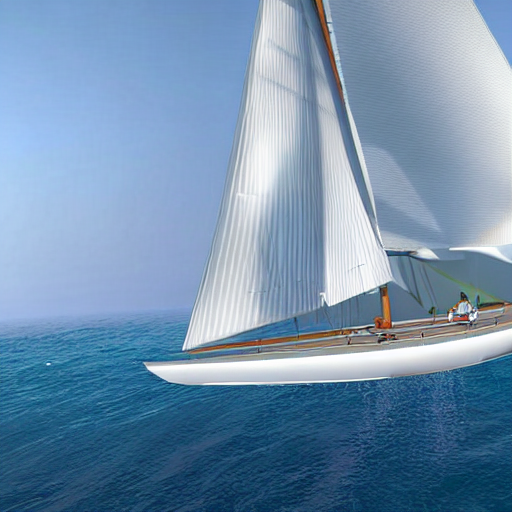

In [10]:
from PIL import Image

# Load your image file
image = Image.open('rose.jpg')

rose = agent.run("Generate a sail yacht in the water, digital art", image= image)
rose

==Explanation from the agent==
I will use the following  tool: `image_generator` to generate an image according to the prompt.


==Code generated by the agent==
prompt = "Draw me a picture of a peach color rose in the wooden vase"
image = image_generator(prompt)


==Result==


A new version of the following files was downloaded from https://huggingface.co/space/huggingface-tools/text-to-image:
- text_to_image.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


  0%|          | 0/25 [00:00<?, ?it/s]

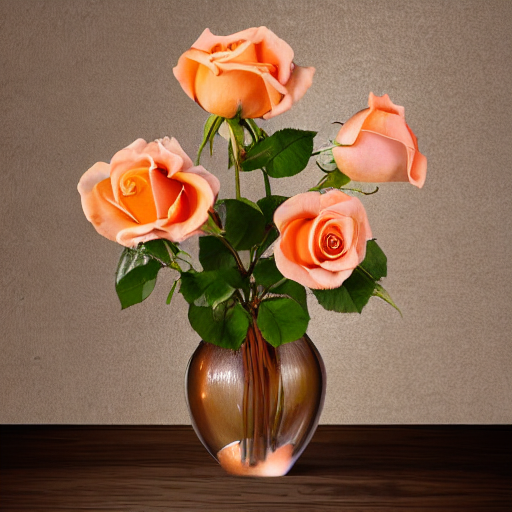

In [9]:
agent.run("Draw me a picture of a peach color rose in the wooden vase")

==Explanation from the agent==
I will use the following  tool: `image_transformer` to generate the image.


==Code generated by the agent==
image = image_transformer(image, prompt="peach color rose in wooden vase Van Gogh style")


==Result==


  0%|          | 0/50 [00:00<?, ?it/s]

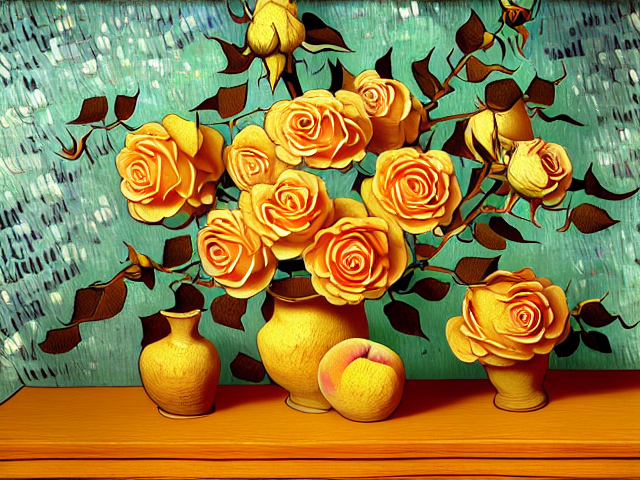

In [12]:
agent.run("Generate a peach color rose in the wooden vase Van Gogh style", image=image)

In [17]:
from transformers import HfAgent

agent = HfAgent("https://api-inference.huggingface.co/models/bigcode/starcoder")
agent.run("Is the following `text` (in Spanish) positive or negative?", text="¡Este es un API muy agradable!")

==Explanation from the agent==
I will use the following  tool: `text_classifier` to classify the text.


==Code generated by the agent==
label = text_classifier(text=text, labels=["positive", "negative"])
print(f"The text is {label}.")


==Result==
The text is positive.


'positive'

In [6]:
rose

In [1]:
!pip install textract

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
from transformers.tools import HfAgent


import textract

text = textract.process('/content/frugal_gpt.pdf').decode('utf-8')

In [11]:
agent = HfAgent("https://api-inference.huggingface.co/models/bigcode/starcoder")

In [13]:
agent.run('Base on the text can you extract and display some images from it', text=text)

==Explanation from the agent==
I will use the following  tool: `text_downloader` to download the text, then `image_segmenter` to extract the images.


==Code generated by the agent==
text = text_downloader(url)
images = image_segmenter(text)


==Result==


A new version of the following files was downloaded from https://huggingface.co/space/huggingface-tools/text-download:
- text_download.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


Evaluation of the code stopped at line 0 before the end because of the following error:
The variable `url` is not defined.


In [14]:
agent.run("Based on `text` can you summarize for me it?", text = text)

==Explanation from the agent==
I will use the following  tools: `text_classifier` to classify the text, then `summarizer` to summarize it.


==Code generated by the agent==
label = text_classifier(text, labels=["positive", "negative"])
print(f"The text is {label}.")
summary = summarizer(text)


==Result==


╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <cell line: 1>:1                                                                              │
│                                                                                                  │
│ /usr/local/lib/python3.10/dist-packages/transformers/tools/agents.py:323 in run                  │
│                                                                                                  │
│   320 │   │   if not return_code:                                                                │
│   321 │   │   │   print("\n\n==Result==")                                                        │
│   322 │   │   │   self.cached_tools = resolve_tools(code, self.toolbox, remote=remote, cached_   │
│ ❱ 323 │   │   │   return evaluate(code, self.cached_tools, state=kwargs.copy())                  │
│   324 │   │   else:                                                                              │
│   325 │   │   │   tool_code = get_tool_creation_code(code, self.toolbox, remote=remote)          │
│   326 │   │   │   return f"{tool_code}\n{code}"                                                  │
│                                                                                                  │
│ /usr/local/lib/python3.10/dist-packages/transformers/tools/python_interpreter.py:61 in evaluate  │
│                                                                                                  │
│    58 │   result = None                                                                          │
│    59 │   for idx, node in enumerate(expression.body):                                           │
│    60 │   │   try:                                                                               │
│ ❱  61 │   │   │   line_result = evaluate_ast(node, state, tools)                                 │
│    62 │   │   except InterpretorError as e:                                                      │
│    63 │   │   │   msg = f"Evaluation of the code stopped at line {idx} before the end because    │
│    64 │   │   │   if chat_mode:                                                                  │
│                                                                                                  │
│ /usr/local/lib/python3.10/dist-packages/transformers/tools/python_interpreter.py:98 in           │
│ evaluate_ast                                                                                     │
│                                                                                                  │
│    95 │   if isinstance(expression, ast.Assign):                                                 │
│    96 │   │   # Assignement -> we evaluate the assignement which should update the state         │
│    97 │   │   # We return the variable assigned as it may be used to determine the final resul   │
│ ❱  98 │   │   return evaluate_assign(expression, state, tools)                                   │
│    99 │   elif isinstance(expression, ast.Call):                                                 │
│   100 │   │   # Function call -> we return the value of the function call                        │
│   101 │   │   return evaluate_call(expression, state, tools)                                     │
│                                                                                                  │
│ /usr/local/lib/python3.10/dist-packages/transformers/tools/python_interpreter.py:139 in          │
│ evaluate_assign                                                                                  │
│                                                                                                  │
│   136                                                                                            │
│   137 def evaluate_assign(assign, state, tools):                                                 │
│   138 │   var_names = assign.targets                       

In [19]:
audio = agent.run("Can you generate an image of a train? Please read out loud the contents of the image afterwards")
play_audio(audio)

==Explanation from the agent==
I will use the following  tools: `image_segmenter` to create a segmentation mask of the train, then `text_reader` to read the contents of the image out loud.


==Code generated by the agent==
mask = image_segmenter(image, label="train")
print(f"The mask is {mask}")
audio_mask = text_reader(mask)


==Result==
Evaluation of the code stopped at line 0 before the end because of the following error:
The variable `image` is not defined.


╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <cell line: 2>:2                                                                              │
│ in play_audio:12                                                                                 │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
AttributeError: 'NoneType' object has no attribute 'numpy'